In [1]:
import couchdb
import datetime
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

plt.style.use('dark_background')

In [2]:
 def convertToDateTimeObj(unixTime):
    return datetime.datetime.fromtimestamp(
        unixTime
    )

server_address = 'http://localhost'
port = 5984
db_name = 'environmental_data_point'

server = couchdb.Server('{}:{}/'.format(server_address, port))
env_db = server[db_name]

sensor_dict = {
    'air_humidity':(0,70),
    'air_temperature':(15,30),
    'air_carbon_dioxide':(200,700),
    'water_temperature':(15,30),
    'water_level_low':(0,1),
    'water_level_high':(0,1),
    'water_potential_hydrogen':(5,7),
    'water_electrical_conductivity':(0,5)
}
sensor_list = [
    'air_humidity',
    'air_temperature',
    'air_carbon_dioxide',
    'water_temperature',
    'water_potential_hydrogen',
    'water_electrical_conductivity',
]




In [3]:
def getSeriesData(env_variable):
    variable_data_list = []
    unique_time_set = set([])
    for item in env_db.view('pfc/all_vars'):
        if item.value['variable']  == env_variable and not item.value['is_desired']: 
            if not item.value['timestamp'] in unique_time_set:
                variable_data_list.append(item.value)
                unique_time_set.add(item.value['timestamp'] )
    if len(variable_data_list) ==0:
        return None
    
    date_value_list = np.array([[
        variable_data['value'], convertToDateTimeObj(variable_data['timestamp'])]
    for variable_data in variable_data_list])
    ts = Series(date_value_list[:,0].astype(dtype=np.float64), index=date_value_list[:,1])
    return ts


In [4]:
ts_dict = {}
for env_variable in sensor_list:
    ts = getSeriesData(env_variable)
    if ts is not None: ts_dict[env_variable] = ts 
df = DataFrame(ts_dict)
df

,air_carbon_dioxide,air_humidity,air_temperature,water_electrical_conductivity,water_potential_hydrogen,water_temperature
2017-10-07 19:28:15.386612,NaN,NaN,NaN,NaN,NaN,25.440000
2017-10-07 19:28:15.386760,429.000000,NaN,NaN,NaN,NaN,NaN
2017-10-07 19:28:15.386886,NaN,NaN,NaN,NaN,7.750000,NaN
2017-10-07 19:28:15.387301,NaN,NaN,28.30000,NaN,NaN,NaN
2017-10-07 19:28:15.387524,NaN,NaN,NaN,0.340000,NaN,NaN
2017-10-07 19:28:15.392766,NaN,44.000000,NaN,NaN,NaN,NaN
2017-10-07 19:29:08.387710,424.669267,NaN,NaN,NaN,NaN,NaN
2017-10-07 19:29:15.393337,429.886044,NaN,NaN,NaN,NaN,NaN
2017-10-07 19:31:56.393534,NaN,44.443481,NaN,NaN,NaN,NaN
2017-10-07 19:32:21.388778,434.383973,NaN,NaN,NaN,NaN,NaN


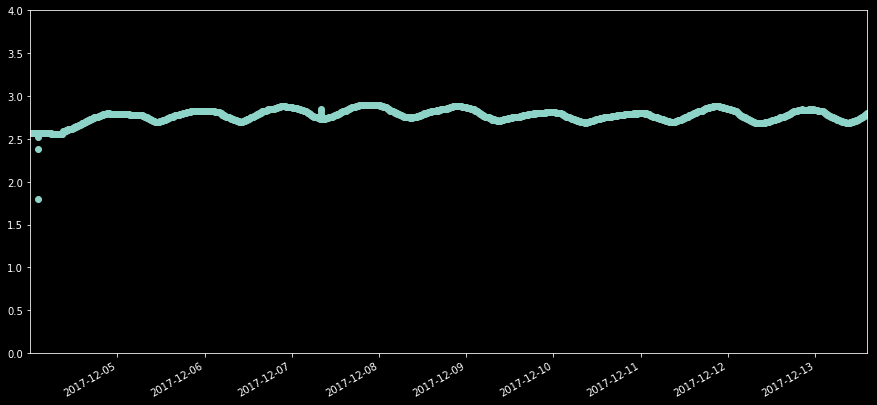

In [5]:
df.water_electrical_conductivity['2017-12-04':].plot(figsize=(15,7),ylim=(0,4),style='o')
plt.show()

In [ ]:
df.plot()
plt.show()

## problem
- lighlight_illuminanceが表示できない
    - 以下のコードを入力しても何も出てこない？？要原因調査
- water_level_high, water_level_lowがboolean値であるため表示しにくい

In [ ]:
i = 0
for item in env_view:
    if item.value['variable'] == 'light_illuminance':
        print(item.value)
        i += 1
        if i > 100:
            break

In [ ]:
len(env_db.view)

In [ ]:
sensor_list = [
    'air_humidity',
    'air_temperature',
    'air_carbon_dioxide',
    'water_temperature',
    'water_level_low',
    'water_level_high',
    'water_potential_hydrogen',
    'water_electrical_conductivity',
    'light_illuminance'

In [ ]:
a = {}
a['a']
'182' in a